# Customer Segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load Data
df = pd.read_csv(r"C:\Users\SPK\Desktop\python\Wholesale customers data.csv")
df.shape

(440, 8)

In [3]:
# check for duplicates
df.duplicated().sum()

0

In [4]:
# check for missing value
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
df2 = df[['Fresh','Milk']]

## Preprocessing

### Feature Scalling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=['Fresh','Milk'])
df2.head()

,Fresh,Milk
0,0.052933,0.523568
1,-0.391302,0.544458
2,-0.447029,0.408538
3,0.100111,-0.624020
4,0.840239,-0.052396


In [7]:
# Applying clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5)
model.fit(df2)

KMeans(n_clusters=3, random_state=5)

In [8]:
pd.DataFrame(model.cluster_centers_,columns=df2.columns)

,Fresh,Milk
0,-0.335576,-0.185284
1,0.057166,3.347973
2,1.776634,-0.074273


In [9]:
# cluster - 0 = heavy spenders on fresh, moderate spenders on milk

# cluster - 1 = moderate spenders on fresh, heavy spenders on milk

# cluster - 2 = low spenders on fresh, low spenders on milk

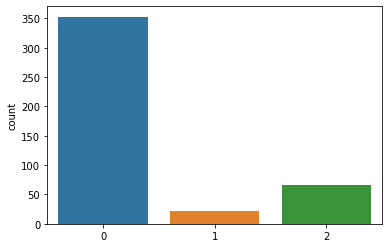

In [10]:
sns.countplot(model.labels_)
plt.show()

In [11]:
df3 = df[['Fresh','Milk','Grocery','Frozen']]
df3 = sc.fit_transform(df3)
df3 = pd.DataFrame(df3,columns=['Fresh','Milk','Grocery','Frozen'])


In [12]:
model2 = KMeans(n_clusters=3,random_state=5)
model2.fit(df3)

KMeans(n_clusters=3, random_state=5)

In [13]:
pd.DataFrame(model2.cluster_centers_,columns=df3.columns)

,Fresh,Milk,Grocery,Frozen
0,1.772100,-0.044529,-0.265158,1.463000
1,-0.280518,1.927433,2.185061,-0.186429
2,-0.237838,-0.240370,-0.239327,-0.202146


## Find the best value of K

In [14]:
k = []
inertia = []
for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df2)
    k.append(i)
    inertia.append(model.inertia_)

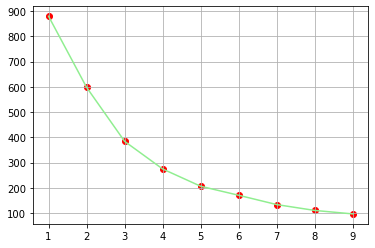

In [15]:
plt.plot(k,inertia,c='lightgreen')
plt.scatter(k,inertia,c='red')
plt.grid(True)
plt.show()